# yahoo_finance 

This module allows basic, low-level access to Yahoo Finance data (stock prices, dividends and splits). Simply start with

In [4]:
import yahoo_finance
yahoo_finance.pandas.options.display.max_rows = 10

## Basic Usage

You can download **stock quotes** with

In [5]:
quotes = yahoo_finance.download_quotes("GILD")
print quotes

                 GILD
1992-01-22   0.585014
1992-01-23   0.635571
1992-01-24   0.642794
1992-01-27   0.693350
1992-01-28   0.678906
...               ...
2018-07-09  76.639999
2018-07-10  76.750000
2018-07-11  76.019997
2018-07-12  77.599998
2018-07-13  77.455002

[6670 rows x 1 columns]


By default this will download all the available price data (with a daily interval). However, you can **change the interval and the time range:**

In [6]:
import datetime

start = datetime.date(2014, 1, 1)
weekly_data = yahoo_finance.download_quotes("GILD", start_date=start, interval=yahoo_finance.WEEKLY)

print weekly_data

                 GILD
2014-01-01  67.282730
2014-01-08  69.325790
2014-01-15  75.418037
2014-01-22  74.576775
2014-01-29  75.824791
...               ...
2018-06-20  70.250000
2018-06-27  71.330002
2018-07-04  76.750000
2018-07-11  77.599998
2018-07-13  77.455002

[238 rows x 1 columns]


You can also download the **dividends** with

In [9]:
dividends = yahoo_finance.download_dividends("GILD")
print dividends[0]

[{u'Date': datetime.datetime(2016, 9, 14, 0, 0), u'Dividends': 0.47}, {u'Date': datetime.datetime(2015, 6, 12, 0, 0), u'Dividends': 0.43}, {u'Date': datetime.datetime(2017, 9, 14, 0, 0), u'Dividends': 0.52}, {u'Date': datetime.datetime(2015, 12, 14, 0, 0), u'Dividends': 0.43}, {u'Date': datetime.datetime(2015, 9, 14, 0, 0), u'Dividends': 0.43}, {u'Date': datetime.datetime(2018, 3, 15, 0, 0), u'Dividends': 0.57}, {u'Date': datetime.datetime(2016, 6, 14, 0, 0), u'Dividends': 0.47}, {u'Date': datetime.datetime(2016, 12, 13, 0, 0), u'Dividends': 0.47}, {u'Date': datetime.datetime(2017, 6, 14, 0, 0), u'Dividends': 0.52}, {u'Date': datetime.datetime(2017, 12, 14, 0, 0), u'Dividends': 0.52}, {u'Date': datetime.datetime(2018, 6, 14, 0, 0), u'Dividends': 0.57}, {u'Date': datetime.datetime(2016, 3, 14, 0, 0), u'Dividends': 0.43}, {u'Date': datetime.datetime(2017, 3, 14, 0, 0), u'Dividends': 0.52}]


You can specify a time range for the dividends, too, using <code>start_date</code> and <code>end_date</code>.

## Download multiple Tickers

You can also download multiple quotes in one call. <code>yahoo_finance</code> will automatically synchronize the price data:

In [10]:
quotes = yahoo_finance.download_quotes(["GILD", "IBM"])
print quotes

                 GILD         IBM
1992-01-22   0.585014    9.564610
1992-01-23   0.635571    9.352064
1992-01-24   0.642794    9.314553
1992-01-27   0.693350    9.377064
1992-01-28   0.678906    9.327059
...               ...         ...
2018-07-09  76.639999  144.389999
2018-07-10  76.750000  144.710007
2018-07-11  76.019997  144.940002
2018-07-12  77.599998  146.449997
2018-07-13  77.440002  146.500000

[6670 rows x 2 columns]


yahoo_finance.py:221: UserWarning: Coverage treshold hit: resulting coverage is 54.48%.
  warnings.warn("Coverage treshold hit: resulting coverage is %.2f%%." % (coverage * 100))


## Getting Ready-To-Use Return Vectors

This module also allow quick access to synchronized return vectors (often required for further data manipulation): 

In [11]:
universe = ["ADS.DE", "SAP.DE", "BAS.DE", "VOW3.DE", "CON.DE"]

# download price data
price_data = yahoo_finance.download_quotes(universe)

# synchronize price data
# and calculate return vector
return_vector = price_data.pct_change().dropna()
print return_vector

              ADS.DE    SAP.DE    BAS.DE   VOW3.DE    CON.DE
1998-07-23 -0.002138 -0.007689 -0.027702 -0.044056 -0.003390
1998-07-24 -0.098574 -0.007960 -0.009302 -0.004121 -0.025512
1998-07-27 -0.049129 -0.051740 -0.021712 -0.028917  0.011344
1998-07-28  0.023747  0.017874 -0.007082 -0.023835  0.075065
1998-07-29  0.037850  0.014788 -0.026700  0.024417 -0.024880
...              ...       ...       ...       ...       ...
2018-07-09  0.001928  0.019407  0.001458 -0.011777  0.006549
2018-07-10  0.017322  0.007891  0.005338 -0.000137  0.005505
2018-07-11 -0.010541 -0.016637 -0.022686 -0.021647 -0.013688
2018-07-12  0.012292  0.013933  0.005680  0.000560  0.009841
2018-07-13  0.012682  0.005497  0.006262  0.007278  0.006497

[5070 rows x 5 columns]


If the resulting price data is much smaller than the original dataset a warning will be raised:

In [12]:
universe = ["SAP.DE", "UN01.DE", "BAS.DE"]
# UN01.DE is Uniper SE, a recent spin-off

price_data = yahoo_finance.download_quotes(universe)

yahoo_finance.py:221: UserWarning: Coverage treshold hit: resulting coverage is 8.51%.
  warnings.warn("Coverage treshold hit: resulting coverage is %.2f%%." % (coverage * 100))


By default the coverage treshold is 90% but can be changed with <code>yahoo_finance.COVERAGE_TRESHOLD</code>.

## Usage Example

### Simple Charting

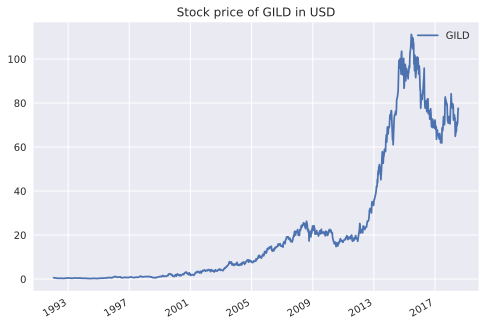

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('seaborn')

quotes = yahoo_finance.download_quotes("GILD", interval=yahoo_finance.WEEKLY)

quotes.plot(title="Stock price of GILD in USD")


Text(0.5,1,'Allianz SE. dividends in EUR')

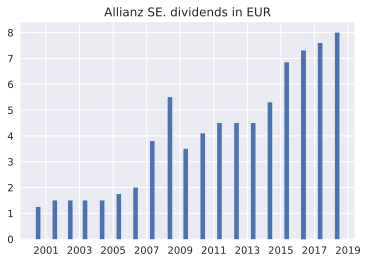

In [15]:
dividends = yahoo_finance.download_dividends("ALV.DE")[0]

plt.bar([payout["Date"] for payout in dividends], [payout["Dividends"] for payout in dividends], width=100)
plt.title("Allianz SE. dividends in EUR")


### Get Correlations of certain Stock Universe

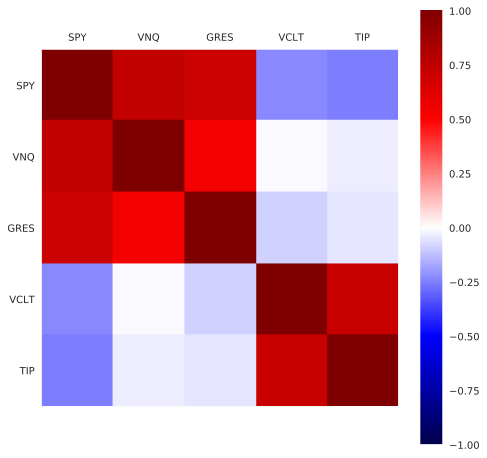

In [17]:
import yahoo_finance
import numpy

universe = ["SPY", "VNQ", "GRES", "VCLT", "TIP"] 
# SP500, REIT, Global Resources, Corp Debt, LT Gov Debt, ST Gov Debt

# get data
price_data = yahoo_finance.download_quotes(universe)
return_vector = price_data.pct_change().dropna()

# calculate corr coef
correlations =return_vector.corr()

# plot it!
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap="seismic")
fig.colorbar(cax)
ticks = numpy.arange(0, correlations.shape[0], 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(universe)
ax.set_yticklabels(universe)
ax.grid(False)